# Homework 4 Solutions
###### MSEN 330 Fall 2021
###### Daniel Willhelm (TA) 

## (1)

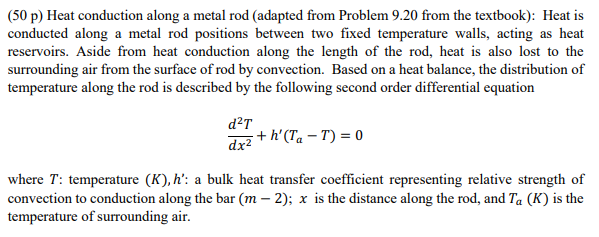

### (a)

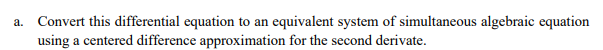

#### Finite Solver Function

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb

def finitesolver_rod(L,Ta,h,T0,Tx,dx):  
  # setup 
  dx2 = dx**2
  # get number of nodes to solve
  n = int(L/dx)-1
  # define system coefficients (specific to this system)
  c = 2. + (h*dx2)
  c_forw = -1
  c_back = -1

  # build system of equations (i.e. A matrix)
  A = np.zeros((n,n))
  for i in range(1,n-1):
    for j in range(n):
      if i==j:
        A[i,j]=c
      elif j==i-1:
        A[i,j]=c_back
      elif j==i+1:
        A[i,j]=c_forw
      else:
        A[i,j]=0.0
  A[0,:2] = c, c_forw
  A[-1,-2:] = c_back, c

  # setup b matrix 
  b = np.zeros(n)
  b = b + h*Ta*dx2
  b[0] = h*Ta*dx2 - c_back*T0
  b[-1] = h*Ta*dx2 - c_forw*Tx

  # solve and return results
  y = np.linalg.solve(A,b)
  x = np.linspace(0,L,n+2)
  y = [T0] + list(y) + [Tx]

  return y,x,[A,b]


#### Make into system of equations

In [ ]:
# Given parameters
Ta = 300
T0 = 320
Tx = 450
h = 0.0425
L = 12
dx = 0.6


# solve using numerical method
inputs = [L,Ta,h,T0,Tx,dx]
res, x, matx = finitesolver_rod(*inputs)

A,b = matx 
print(pd.DataFrame(A))
print(pd.DataFrame(b))

        0       1       2       3   ...      15      16      17      18
0   2.0153 -1.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
1  -1.0000  2.0153 -1.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
2   0.0000 -1.0000  2.0153 -1.0000  ...  0.0000  0.0000  0.0000  0.0000
3   0.0000  0.0000 -1.0000  2.0153  ...  0.0000  0.0000  0.0000  0.0000
4   0.0000  0.0000  0.0000 -1.0000  ...  0.0000  0.0000  0.0000  0.0000
5   0.0000  0.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
6   0.0000  0.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
7   0.0000  0.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
8   0.0000  0.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
9   0.0000  0.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
10  0.0000  0.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
11  0.0000  0.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000
12  0.0000  0.0000  0.0000  0.0000  ...  0.0000  0.0000  0.0000 

### (b) 

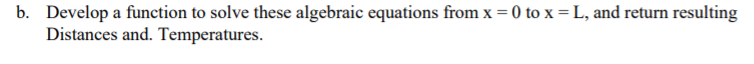

### (c) and (d) 

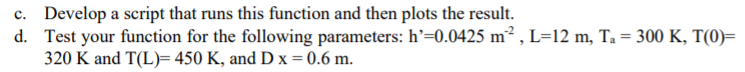

In [ ]:
# see (a)

### (e)
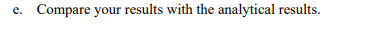

The ODE is a 2nd order linear ODE
The specific solutions is derived from the general solution to the ODE using the boundary conditions and model parameters (*i.e.* h) 

$T(x) = c_1e^{\sqrt{h}x} + c_2e^{\sqrt{h}x} + T_a$


12.586171259098785 7.413828740901216
[[  0.         320.        ]
 [  0.6        320.79893567]
 [  1.2        321.91609506]
 [  1.8        323.3685707 ]
 [  2.4        325.17858548]
 [  3.         327.37383261]
 [  3.6        329.98789938]
 [  4.2        333.06078101]
 [  4.8        336.63949259]
 [  5.4        340.77878841]
 [  6.         345.54199969]
 [  6.6        351.00200356]
 [  7.2        357.24233809]
 [  7.8        364.3584804 ]
 [  8.4        372.45930745]
 [  9.         381.66876191]
 [  9.6        392.12774842]
 [ 10.2        403.99628948]
 [ 10.8        417.45597378]
 [ 11.4        432.71273447]
 [ 12.         450.        ]]


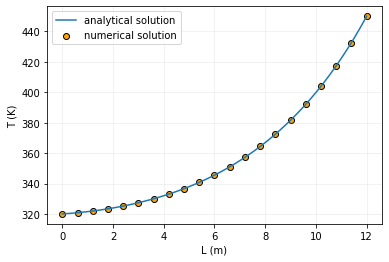

In [ ]:
def analytical_solve(L,Ta,h,T0,Tx,dx):
  '''
  use general form to solve for specific solution given system paramters
  using the given parameters and boundary conditions, we get two unknown constants
  and two equations. I solve for each by building a system of equations. 

  The code then generates and returns a python def function with the correct 
  analytical solution
  '''
  # setup system of eqs. 
  A = np.array([[np.exp(np.sqrt(h)*0), np.exp(-np.sqrt(h)*0)],
                [np.exp(np.sqrt(h)*L), np.exp(-np.sqrt(h)*L)]])
  b = np.array([T0-Ta, Tx-Ta])
  # solve for the c1 and c2 constants
  C1, C2 = np.linalg.solve(A,b)
  # generate a new python def function 
  def f(x):
    return C1*np.exp(np.sqrt(h)*x) + C2*np.exp(-np.sqrt(h)*x) + Ta
  # return the function 
  return f,C1,C2
  
Ta = 300
T0 = 320
Tx = 450
h  = 0.0425
L  = 12
dx = 0.6
inputs = [L,Ta,h,T0,Tx,dx]

# analytical results
f,C01,C02 = analytical_solve(*inputs)
print(C01,C02)
# numerical results
res, x, matx = finitesolver_rod(*inputs)

# plot
fig,ax = plt.subplots(1,1)
xx = np.linspace(0,L)
ax.plot(xx,f(xx),label='analytical solution')
ax.scatter(x,res,c='orange',ec='k',label='numerical solution')

ax.grid(True,alpha=0.2)
ax.set_xlabel('L (m)')
ax.set_ylabel('T (K)')
ax.legend()
TA = analytical_solve(*inputs)

print(np.column_stack((x,res)))

## (2)

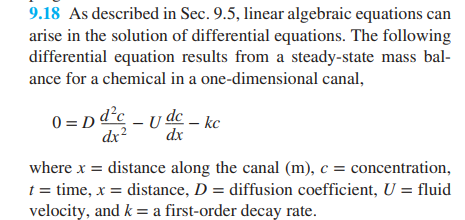

### (a) 

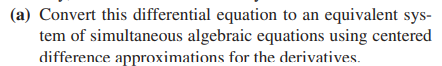

Converting the derivatives to finit difference form: 

>>> $\frac{\partial^2 c}{\partial x^2} = \frac{c_{i-1} - c_{i} + c_{i+1}}{\Delta x^2}$

>>> $\frac{d c}{d x} = \frac{c_{i-1} - c_{i+1}}{2\Delta x}$



therfore, 

>>> $D[\frac{c_{i-1} - c_{i} + c_{i+1}}{\Delta x^2}]-U[\frac{c_{i-1} - c_{i+1}}{2\Delta x}]-kc = 0 $

$T_{i-1} - (2+h^2k)T_i+ T_{i+1} = -hkT_a $



### (b)  Develop a function to solve these equations...


In [ ]:
import numpy as np 

def finitesolver_reaction(D,U,k,L,C0,Cx,dx):
  # setup 
  dx2 = dx**2
  # get number of nodes to solve
  n = int(L/dx)-1
  
  # define system coefficients (specific to this system)
  c = -((2*D)/dx2 + k) 
  c_forw = (D/dx2 - U/(2*dx))
  c_back = (D/dx2 + U/(2*dx))

  # build system of equations (i.e. A matrix)
  A = np.zeros((n,n))
  for i in range(1,n-1):
    for j in range(n):
      if i==j:
        A[i,j]=c
      elif j==i-1:
        A[i,j]=c_back
      elif j==i+1:
        A[i,j]=c_forw
      else:
        A[i,j]=0.0
  A[0,:2] = c, c_forw
  A[-1,-2:] = c_back, c

  # setup b matrix 
  b = np.zeros(n)
  b[0] = 0 - c_back*C0
  b[-1] = 0 - c_forw*Cx

  # solve and return results
  y = np.linalg.solve(A,b)
  x = np.linspace(0,L,n+2)
  y = [C0] + list(y) + [Cx]

  return y,x,[A,b]



### (c) and (d)

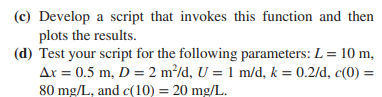

In [ ]:
L= 10 
D = 2.0
U = 1.0
k = 0.2
C0 = 80
Cx = 20
dx = 0.5

inputs = [D,U,k,L,C0,Cx,dx]
res, x, sys = finitesolver_reaction(*inputs)

print(pd.DataFrame(sys[0]))
print(pd.DataFrame(sys[1]))


      0     1     2     3     4     5   ...    13    14    15    16    17    18
0  -16.2   7.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1    9.0 -16.2   7.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
2    0.0   9.0 -16.2   7.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
3    0.0   0.0   9.0 -16.2   7.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
4    0.0   0.0   0.0   9.0 -16.2   7.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
5    0.0   0.0   0.0   0.0   9.0 -16.2  ...   0.0   0.0   0.0   0.0   0.0   0.0
6    0.0   0.0   0.0   0.0   0.0   9.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
7    0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
8    0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
9    0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
10   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
11   0.0   0.0   0.0   0.0   0.0   0.0  

Again this is a 2nd order linear ODE
We can use the general solution to find the specific solution for our system

$Dc'' - Uc' -kc $

$T(x) = c_1e^{kx} + c_2e^{kx} + c_3$

$ k = \frac{U \pm \sqrt{U^2 + 4Dk}}{2U}  $ 

y = 0.003931287964563179*e^(0.6531128874149275x) + 79.99606871203544*e^(-0.1531128874149275x)
0.003931287964563179 79.99606871203544


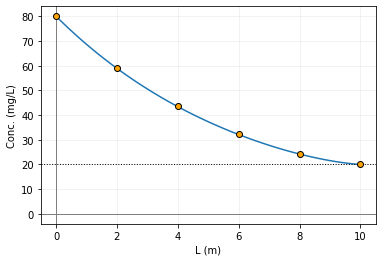

In [ ]:
def analytical_solve(D,U,k,L,C0,Cx,dx):
  '''
  use general form to solve for specific solution given system paramters
  using the given parameters and boundary conditions, we get two unknown constants
  and two equations. I solve for each by building a system of equations. 

  The code then generates and returns a python def function with the correct 
  analytical solution
  '''
  a,b,c = D,U,k
  g1 = (b + np.sqrt(b**2 + 4*a*c))/(2*a)
  g2 = (b - np.sqrt(b**2 + 4*a*c))/(2*a)
 
  # setup system of eqs. 
  A = np.array([[np.exp(g1*0), np.exp(g2*0)],
                [np.exp(g1*L), np.exp(g2*L)]])
  b = np.array([C0,Cx])

  # solve for the c1 and c2 constants
  C1, C2 = np.linalg.solve(A,b)
  # generate a new python def function 
  print(f'y = {C1}*e^({g1}x) + {C2}*e^({g2}x)')
  def f(x):
    return C1*np.exp(g1*x) + C2*np.exp(g2*x)
  # return the function 
  return f,C1,C2

L= 10 
D = 2.0
U = 1.0
k = 0.2
C0 = 80
Cx = 20
dx = 2

# solve numerically
inputs = [D,U,k,L,C0,Cx,dx]
res, x, sys = finitesolver_reaction(*inputs)

# solve analytical: 
f, c01,c02 = analytical_solve(*inputs)

print(c01,c02)
fig,ax = plt.subplots(1,1)
xx = np.linspace(0,L,)
ax.plot(xx,f(xx))
ax.scatter(x,res,ec='k',c='orange',zorder=10)
ax.grid(True,alpha=0.2)
ax.axhline(0,lw=1,c='grey')
ax.axvline(0,lw=1,c='grey')
ax.set_xlabel('L (m)')
ax.set_ylabel('Conc. (mg/L)')
ax.axhline(Cx,ls=':',lw=1,color='k')

plt.show() 

In [ ]:
print(pd.DataFrame(np.column_stack((x,res))))

       0          1
0    0.0  80.000000
1    0.5  74.109764
2    1.0  68.654024
3    1.5  63.601046
4    2.0  58.921533
5    2.5  54.588488
6    3.0  50.577101
7    3.5  46.864663
8    4.0  43.430520
9    4.5  40.256065
10   5.0  37.324795
11   5.5  34.622443
12   6.0  32.137203
13   6.5  29.860101
14   7.0  27.785543
15   7.5  25.912127
16   8.0  24.243796
17   8.5  22.791479
18   9.0  21.575399
19   9.5  20.628308
20  10.0  20.000000
